### ID5059 KDDM
### Assignment: P02
### Group Name : Demented But Determined

Group Members:
- 200005828
- 190001708
- 210012057
- 210003557
- 210010283
- 210005313

<hr>

## Introduction






<hr>

## Dataset Summary

The dataset consists of five files :
1.	test_identity.csv
    - Identity Dataset to test performance of model
2.	test_transaction.csv
    - Transaction Dataset to test performance of model
3.	train_identity.csv
    - Identity Dataset to be used for model training
4.	train_transaction.csv
    - Transaction Dataset to be used for model training
5.	sample_submission.csv
    - File containing prediction results


Column names in train and test identity dataset has different formats.
We renamed test identity columns name to match to that of train column names.

## Transaction Dataset :

Columns in the transaction dataset can be grouped as below:

1.	TransactionID
    -	ID of the transaction and is used to connect to identity dataset
2.	isFraud
    -	Indicating if the transaction is fraud or not
3.	TransactionAmt
    -	Transaction amount (in USD)
4.	ProductCD
    - Product code  with 5 distinct categories
    - Categorical Features
5.	card1 -  card6
    - Payment card information
    - Card 4 contains 4 distinct categories of the card used for the transaction
    - Card5 has 120 unique values
    - Card6 has 4 distinct categories
    - Categorical Features
    - Actual values are masked for some columns
6.	addr1 - addr2
    - addr1 - billing region
    - addr2 -  billing country
    - Categorical Features
7.	dist1 - dist2
    - Distance
    - Categorical Features
8.	P_emaildomain
    - purchaser email domains
    - Categorical Features
9.	R_emaildomain
    - recipient email domains
    - Categorical Features
10.	C1 - C14
    - counting, such as how many addresses are found to be associated with the payment card, etc.
    - The actual meaning is masked
11.	D1 - D15
    - timedelta, such as days between previous transaction, etc
12.	M1 - M9
    - match, such as names on card and address, etc.
    - Categorical Features
13.	V1 - V339
    - Vesta engineered rich features, including ranking, counting, and other entity relations.


## Identity Dataset :

1.	TransactionID
    - ID of the transaction and is used to connect to transaction dataset
2.	DeviceType
    - Device type used for transaction mobile or desktop
    - Categorical Features
3.	DeviceInfo
    - Information about the device used for transaction
    -   Categorical Features
4.	id-01 to id-38
    - Masked information about the device



### Install libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn import over_sampling
from utils.preprocess import preprocess
from utils.reduce_memory import reduce_mem_usage
from sklearn.model_selection import train_test_split


### Load the data

Download the dataset from Kaggle and unzip it 'data' folder parallel to the notebook.

In [3]:
root_dir = './data/'
test_iden = pd.read_csv(root_dir + 'test_identity.csv')
test_tran = pd.read_csv(root_dir + 'test_transaction.csv')
train_iden = pd.read_csv(root_dir + 'train_identity.csv')
train_tran = pd.read_csv(root_dir + 'train_transaction.csv')

Due to the large size, to keep loading size down we optimize data types to reduce memory usage.

In [4]:
print(f"Before Type down-casting  : The shape of the Train {train_tran.shape} , Test {test_tran.shape}")
test_tran = reduce_mem_usage(test_tran)
train_tran = reduce_mem_usage(train_tran)
print(f"Before Type down-casting  : The shape of the Train {train_tran.shape} , Test {test_tran.shape}")

Before Type down-casting  : The shape of the Train (590540, 394) , Test (506691, 393)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%
Before Type down-casting  : The shape of the Train (590540, 394) , Test (506691, 393)


In [5]:
#Merge the Transaction and Identity data set to create the 'Test' set.
train = pd.merge(train_tran, train_iden, on = 'TransactionID', how = 'left')
test = pd.merge(test_tran, test_iden, on = 'TransactionID', how = 'left')

In [6]:
print(f"After merging  : The shape of the Train {train.shape} , Test {test.shape}")

After merging  : The shape of the Train (590540, 434) , Test (506691, 433)


In [7]:
SEED= 42
train, dev_test = train_test_split(train, test_size=0.2, random_state=int(SEED))

print("Train size"+ str(train.shape))
print("DevTest size"+ str(dev_test.shape))

Train size(472432, 434)
DevTest size(118108, 434)


In [8]:
del train_tran, train_iden, test_iden, test_tran

Test_dataset and train_dataset had a mismatch in the name of id features.
In the train_dataset id features were present with the name id_x where x was a value between
01 and 38 whereas in the test_dataset id features were of the form id-x.
So, we changed the format of id features in the test_dataset from id-x to id_x.

In [9]:
test.columns  = [col.replace('-','_') for col in test.columns]

In [10]:
# OK, the problem here is that D features are mostly NaNs!
d_features=["D"+str(x) for x in range(1,15)]
train[d_features].head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
5307,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
191582,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
260168,7.0,7.0,6.0,420.0,6.0,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN
18516,211.0,211.0,NaN,211.0,211.0,211.0,211.0,162.75,0.75,211.0,NaN,NaN,0.0,NaN
47538,0.0,NaN,NaN,NaN,NaN,NaN,NaN,204.00,0.00,NaN,NaN,NaN,NaN,NaN
62390,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
288883,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
397255,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
465998,13.0,13.0,14.0,14.0,14.0,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN
323478,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [11]:
m_features=["M"+str(x) for x in range(1,9)]
train[m_features].head(10)


,M1,M2,M3,M4,M5,M6,M7,M8
5307,T,T,T,M0,T,T,F,F
191582,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN
260168,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
18516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62390,T,T,T,NaN,NaN,NaN,NaN,NaN
288883,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
397255,T,T,T,NaN,NaN,F,F,F
465998,T,T,T,NaN,NaN,F,F,F
323478,T,T,T,M0,F,F,NaN,NaN


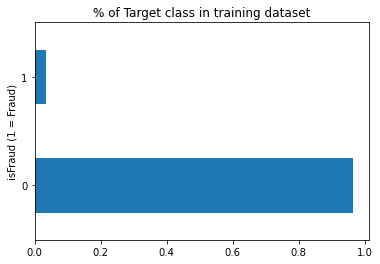

In [12]:
train['isFraud'].value_counts(normalize = True).plot(kind= 'barh')
plt.title('% of Target class in training dataset')
plt.ylabel('isFraud (1 = Fraud)')
plt.show()


## Feature Preprocessing

Systematically, deal with features by considering the following,
- 'M' columns - look like true or false lets convert them to 1, 0
- 'D' columns - these are fine all numerical
- 'C' columns - numerical except for 4,6

We deal with categorical variables using dummy vars.

In [13]:
train = preprocess(train)
test = preprocess(test)
dev_test = preprocess(dev_test)

In [14]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1
5307,2992307,0,174911,59.0000,W,4988,334.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191582,3178582,0,4301977,23.3750,C,3867,296.0,185.0,visa,226.0,...,2.700445,2.944736,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
260168,3247168,0,6229929,35.9375,W,12577,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,2.597656,2.148405,2.490234,2.056071,2.582031,2.174831
18516,3005516,0,497176,100.0000,R,6019,583.0,150.0,visa,226.0,...,0.579748,0.632194,0.815571,0.858382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47538,3034538,0,1124702,75.0000,H,16075,514.0,150.0,mastercard,102.0,...,0.481128,0.548746,0.815978,0.835990,NaN,NaN,NaN,NaN,NaN,NaN


### What features are we dropping and why?

TransactionID - Only a unique identifier for identity.

Id Columns - All Id columns contain at least 75% NaN values

V Columns - V columns consists of Vesta engineered features. They are large is number, have additional training overhead
            and do not add any significant performance improvement (As per Kaggle data discussion ).

<AxesSubplot:title={'center':'NaN as a % in ID columns'}>

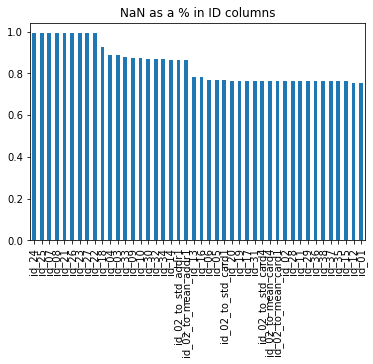

In [15]:
id_cols = [col for col in train.columns if col.startswith('id')]
df_id = train[id_cols]
nulls = df_id.isnull().sum()/len(df_id) #as a percentage
nulls.sort_values(ascending=False).plot.bar(title='NaN as a % in ID columns')

In [16]:
v_cols = [col for col in train.columns if col.startswith('V')]
train.drop(v_cols,axis =1, inplace = True)
train.drop(id_cols, axis = 1,inplace = True)
test.drop(v_cols,axis =1, inplace = True)
test.drop(id_cols, axis = 1,inplace = True)
dev_test.drop(v_cols,axis =1, inplace = True)
dev_test.drop(id_cols, axis = 1,inplace = True)

In [17]:
categorical_features = list(set(train.columns) - set(train._get_numeric_data().columns))
#we get dummy for some features only
all_cat_col_names = [ col for col in categorical_features
                    if len(train[col].unique()) < 15]

large_cats_col_names = list(set(train.columns) - set(train._get_numeric_data()) - set(all_cat_col_names))

One hot encoding of all the categorical variables.

In [18]:
from sklearn.preprocessing import OneHotEncoder  #the disco import
def dummy_transform(df,encoder,col):
  new_col = [col+'_' + str(i)  for i in encoder.categories_[0].tolist()]
  dummy_arr = encoder.transform(df[col].to_numpy().reshape(-1, 1))
  dummy_df = pd.DataFrame(dummy_arr, columns = new_col)

  # Allows nice concat-ing
  dummy_df.reset_index(drop=True, inplace=True)
  df.reset_index(drop=True, inplace=True)
  return pd.concat([df, dummy_df],axis =1)


for col in all_cat_col_names:
  print('encoding',col)
  enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
  dummy_train = enc.fit_transform(train[col].to_numpy().reshape(-1, 1))

  train = dummy_transform(train,enc,col)
  dev_test = dummy_transform(dev_test,enc,col)
  test = dummy_transform(test,enc,col)

encoding OS_id_30
encoding M2
encoding M7
encoding R_emaildomain_3
encoding card6
encoding P_emaildomain_2
encoding M4
encoding card4
encoding DeviceType
encoding ProductCD
encoding M8
encoding M6
encoding M9
encoding M3
encoding R_emaildomain_2
encoding M5
encoding P_emaildomain_3
encoding device_name
encoding M1


In [19]:
(train.shape, dev_test.shape,test.shape)


((472432, 187), (118108, 187), (506691, 186))

In [20]:
print(f"Before dropping: The shape of the Train {train.shape} ")

train.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the Train {train.shape} ")

Before dropping: The shape of the Train (472432, 187) 
After dropping: The shape of the Train (472432, 168) 


In [21]:
print(f"Before dropping: The shape of the test {test.shape} ")

test.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the test {test.shape} ")

Before dropping: The shape of the test (506691, 186) 
After dropping: The shape of the test (506691, 167) 


In [22]:
print(f"Before dropping: The shape of the test {dev_test.shape} ")
dev_test.drop(all_cat_col_names,axis =1,inplace = True )
print(f"After dropping: The shape of the test {dev_test.shape} ")

Before dropping: The shape of the test (118108, 187) 
After dropping: The shape of the test (118108, 168) 


In [23]:
a=[c for c in train.columns if c.startswith('card')]
train[a].head()

,card1,card2,card3,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_nan,card4_american express,card4_discover,card4_mastercard,card4_visa,card4_nan
0,4988,334.0,150.0,226.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3867,296.0,185.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12577,268.0,150.0,166.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6019,583.0,150.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16075,514.0,150.0,102.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
train['isFraud'].unique()

array([0, 1], dtype=int8)

In [25]:
(train.shape, dev_test.shape)

((472432, 168), (118108, 168))

We need to deal with the variables with high number of cats.

In [26]:
def frequency_encoder(x,groupby):
  if x == None:
    return groupby.get(np.nan)
  else:
    return groupby.get(x)


  # large_cats
for col in large_cats_col_names:
  freq_enc = (train.groupby(col,dropna=False  # to prevent loss of information
                            ).size()) / len(train)
  train[col+'freq'] = train[col].apply(lambda x : frequency_encoder(x,freq_enc))
  test[col+'freq'] = test[col].apply(lambda x : frequency_encoder(x,freq_enc))
  dev_test[col+'freq'] = dev_test[col].apply(lambda x : frequency_encoder(x,freq_enc))

train.drop(large_cats_col_names,axis = 1,inplace = True)
test.drop(large_cats_col_names,axis = 1,inplace = True)
dev_test.drop(large_cats_col_names,axis = 1,inplace = True)


### Column Imputation

How are we dealing with NaN/Missing/Infinite Values?


To use SMOTE we must remove np.infs and NaNs,
  - So we initially drop columns with less than 80% non-NA values.
  - Then, we drop rows containing NaN values

Using this resulted in a higher performance on balanced score measures than
keeping NaNs and not using SMOTE.


In [27]:
high_NA_columns = train.columns[train.isnull().sum()/len(train)>0.2]
## We need train_na asa separate DF for further processing.
train_na = train.drop(high_NA_columns, axis=1)
test= test.drop(high_NA_columns, axis=1)
dev_test = dev_test.drop(high_NA_columns, axis=1)

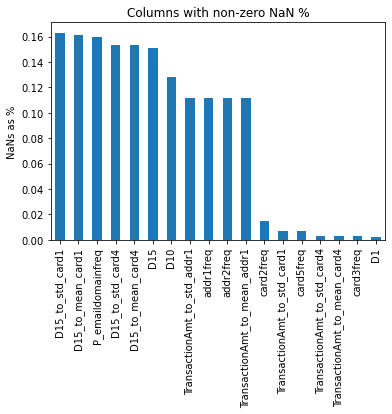

In [28]:
# nulls = train_na.isnull().sum()/len(train_na) #as a percentage
# nulls.sort_values(ascending=False)
# # nulls.sort_values(ascending=False).plot.barh(title='NaN as a %')

nulls = train_na.isnull().sum()/len(train_na) #as a percentage
nulls[nulls.values > 0].sort_values(ascending=False).plot.bar()
plt.title('Columns with non-zero NaN %')
plt.ylabel('NaNs as %')
plt.show()

train_no_na = train_na[~train_na.isin([np.nan, np.inf, -np.inf]).any(1)]


### Outlier removal

Since we are using ensemble tree methods that are robust to
outliers we choose not to perform outlier removal. Doing it in a
feature agnostic manner would destroy information on anomalies and doing
so otherwise would require pruning each column.

### Feature engineering (Creation)
##### Splitting email domains
       - Domain name of an email looks like important feature and we extracted the domain
         from
##### Checking decimals in the transaction Amount
##### Extracting device info
      - device name
          Extaction
          Correction
      - device version
      - Operating system ID
      - Operating system version
      - browser ID
      - browser version
      - screen width
      - screen height

#### Aggregating columns to generate new features
      Generating new features by dividing certain numerical features by calculating
      certain groups' mean or std value of different features
#### Changing data types of categorical columns to category
      Generating new features to make sure that every cell has only one value,
      such as splitting “id_30” into “screen_width” and “screen_height”
#### Converting M columns to 1 and 0
      Replacing the values of M columns- object features to 0 and 1
#### Transaction Amount Transformations
      Generating new features to get the number of decimal places in the transaction amount,
      the decimal value of the transaction amount and the logarithm of transaction amount

### Class Balancing
To perform class balancing we use SMOTE from Imbalanced Learn, to create samples
of minority data.

In [29]:
# Class balancing only for train data for comparing it later on.

train_no_na = train_na[~train_na.isin([np.nan, np.inf, -np.inf]).any(1)]
test = test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
dev_test = dev_test[~dev_test.isin([np.nan, np.inf, -np.inf]).any(1)]
# train_no_na = train_no_na._get_numeric_data()
X_train, y_train = train_no_na.drop('isFraud',axis = 1), train_no_na['isFraud']
oversample = over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.drop('TransactionID', axis=1, inplace = True)

# Dev test data for model checking
X_test, y_test = dev_test.drop(['isFraud', 'TransactionID'], axis = 1), dev_test['isFraud']


In [ ]:
y_train.value_counts(normalize = True).plot(kind= 'barh')
plt.title('% of class')
plt.ylabel('isFraud (1 = Fraud)')
plt.show()

## Model Creation & Fitting
### Individual models

#### XGBoost model fitting

In [ ]:
from sklearn.metrics import accuracy_score

import xgboost as xgb

xgb_cl = xgb.XGBClassifier(
    # tree_method='gpu_hist', gpu_id=0,
    # max_depth = 10,
    n_estimators=500,
    learning_rate = 0.01
    )
eval_set  = [(X_train, y_train), (X_test, y_test)]

xgb_cl.fit(X_train, y_train,
           eval_set = eval_set,
           eval_metric = 'auc',
           verbose=True,
           early_stopping_rounds=10,
           )

preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)
xgb_cl.save_model("xgb.json")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds,normalize='true')

#### XGBoost tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

xgb_cl = xgb.XGBClassifier(
    # tree_method='gpu_hist', gpu_id=0
    )
params = { 'max_depth': [3, 5, 10, 15],
           'learning_rate': [0.01, 0.1],
           'subsample': np.arange(0.4, 1.0, 0.2),
           'colsample_bytree': np.arange(0.4, 1.0, 0.2),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.2),
           'n_estimators': [100, 500, 1000]

          }
fit_params = {
          'early_stopping_rounds': 10,
          'eval_set' : eval_set,
          'eval_metric': 'auc',
          'verbose': True
}

clf = RandomizedSearchCV(estimator=xgb_cl,
                         param_distributions=params,
                         n_jobs = -1,
                          scoring='roc_auc',
                         n_iter=5,
                        #  verbose=3
                         )

search = clf.fit(X_train, y_train,**fit_params)
path = '/content/drive/MyDrive/Python/ID5059-GroupProject/'
clf.best_estimator_.save_model(path + 'optim_xgb.json')
preds_optimised = clf.predict(X_test)

### Random forest

In [ ]:

# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from sklearn.model_selection import GridSearchCV
# # Create a base model
# rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, oob_score = True, random_state = 10000)
# # Create a parameter grid to conduct a grid search for hyperparameters
# param_grid = { 'bootstrap' : [True],
#            'max_depth': [3, 5, 6, 10, 15, 20],
#            'n_estimators': [100, 500, 1000]}
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 0)
# # Fit the grid search to the data and calculate its oob score
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a random forest classifier model with the best hypermarket fits
rf_final = RandomForestClassifier(n_estimators = 100, max_depth = 5, n_jobs = -1, oob_score = True, random_state = 10000)
rf_final = rf_final.fit(X_train, y_train)
y_pred = rf_final.predict(X_test)
score = roc_auc_score(y_test, y_pred)
# Print AUC score
print(f"AUC = {score}")

AUC = 0.6678085912433955


## Bagging Classifier

In [ ]:
# Model Tuning
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from random import  sample
# param_grid = [
#   {'base_estimator__max_depth' : [1, 3, 5, 7, None],
#    'base_estimator__min_samples_split' : [0.01, 2],
#    'base_estimator__min_samples_leaf' : [0.01, 2]
#    }
#  ]
# ind = sample(range(len(X_train)), 10000)
#
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(max_features='auto',
#                               ccp_alpha=0.0015,
#                               )
# bag = BaggingClassifier(base_estimator = tree,
#                         n_estimators=1000,
#                         max_samples=0.6,
#                         oob_score=True,
#                         n_jobs=-1
#                         )
# score = "roc_auc"
# bag_clf = GridSearchCV(bag,
#                        param_grid,
#                        scoring=score,
#                        n_jobs = -1)
# bag_clf.fit(X_train.iloc[ind], y_train.iloc[ind])
# print("Best parameters set found on development set:")
# print(bag_clf.best_params_)
# print("Grid scores on development set:")
# means = bag_clf.cv_results_["mean_test_score"]
# stds = bag_clf.cv_results_["std_test_score"]
# for mean, std, params in zip(means, stds, bag_clf.cv_results_["params"]):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
# Predictions
# ind = sample(range(len(X_train)), 10000)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# The below parameters are the optimal parameters from GridSearchCV
tree = DecisionTreeClassifier(max_features='auto',
                              ccp_alpha=0.0015,
                              max_depth=7,
                              min_samples_leaf=0.01
                              )
bag_clf = BaggingClassifier(base_estimator = tree,
                        n_estimators=1000,
                        max_samples=0.6,
                        oob_score=True,
                        n_jobs=-1
                        )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
score = roc_auc_score(y_test, y_pred)
# Print AUC score
print(f"AUC = {score}")

### Light Gradient Boosting Machine (LGBM)

In [30]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 5313,
         }

feature_importances = pd.DataFrame()
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

lgb_clf = lgb.train(params, dtrain, 1000, valid_sets = [dtrain, dvalid])


feature_importances = lgb_clf.feature_importance()

y_pred_valid = lgb_clf.predict(X_test)
score = roc_auc_score(y_test, y_pred_valid)
print(f"AUC = {score}")



[1]	training's auc: 0.985134	valid_1's auc: 0.809139
[2]	training's auc: 0.991393	valid_1's auc: 0.833679
[3]	training's auc: 0.993498	valid_1's auc: 0.835472
[4]	training's auc: 0.994444	valid_1's auc: 0.838359
[5]	training's auc: 0.994864	valid_1's auc: 0.838262
[6]	training's auc: 0.995406	valid_1's auc: 0.843505
[7]	training's auc: 0.995624	valid_1's auc: 0.843971
[8]	training's auc: 0.995734	valid_1's auc: 0.847717
[9]	training's auc: 0.995877	valid_1's auc: 0.846782
[10]	training's auc: 0.996038	valid_1's auc: 0.847835
[11]	training's auc: 0.996232	valid_1's auc: 0.846702
[12]	training's auc: 0.996296	valid_1's auc: 0.847761
[13]	training's auc: 0.996315	valid_1's auc: 0.849125
[14]	training's auc: 0.996328	valid_1's auc: 0.84991
[15]	training's auc: 0.996356	valid_1's auc: 0.851396
[16]	training's auc: 0.996376	valid_1's auc: 0.851852
[17]	training's auc: 0.996385	valid_1's auc: 0.8524
[18]	training's auc: 0.996574	valid_1's auc: 0.852791
[19]	training's auc: 0.99658	valid_1's a

### Adaboost

In [34]:
#Import required modules
from sklearn.ensemble import AdaBoostClassifier

#Build the model
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaModel = clf.fit(X_train, y_train)

#Adaboost Score
adaScore = adaModel.score(X_test, y_test)
print(adaScore)

0.9679679976294541


### Model Ensemble

Having fitted several models, we now combine them to try squeeze out any further predictive performance.
This is achieved through the use of SKLearn's StackingClassifier.

In [ ]:
from utils.model_stack import stack_models

models = {'xgb':xgb_cl,
          'bag': bag_clf,
          'lgb': lgb_clf,
          'rf':rf_final,
          'AdaBoost': adaModel
          }
stacked_model = stack_models(*models.items(), cv_folds=3)
stacked_model.fit(X_train, y_train)
models['lgbm'] = lgb_clf
models['stacked'] = stacked_model

In [ ]:
# Create a dataframe to show the performance of each model
performance = pd.DataFrame(y_test)
performance['stacking_prediction'] = stacked_model.predict(X_test)
for m in stacked_model.named_estimators_:
        performance[m] = stacked_model.named_estimators_[m].predict(X_test)


# See how each of our models correlate with our target
print("Correlations with target column")
print(performance.corr()['isFraud'])


In [ ]:
# Model evaluation using stratified folds
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# evaluate models using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores

In [ ]:
# evaluate the models and store results
results, names = list(), list()
for name, m in models.items():
	scores = evaluate_model(m, X_test, y_test)
	results.append(scores)
	names.append(name)
	print(f'>{name} {mean(scores):0.3f} ({std(scores):0.3f})')

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
from utils.diagnostics import get_diagnostics
get_diagnostics(*models.items(), y_true=y_test, X=X_test)